In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns

import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline

In [2]:
df=pd.read_csv('arrhythmia.csv')

In [3]:
df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [5]:
df.shape

(451, 280)

#### Basic Info

In [6]:
df.shape

(451, 280)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 75 to 8
dtypes: float64(120), int64(155), object(5)
memory usage: 986.7+ KB


In [9]:
df.describe()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# Data Preprocessing

In [12]:
# null check
df.isnull().sum()

75       0
0        0
190      0
80       0
91       0
        ..
0.9.2    0
2.9.1    0
23.3     0
49.4     0
8        0
Length: 280, dtype: int64

In [13]:
# Check the null values count
df.isnull().sum().sum()

0

In [18]:
df.iloc[0:10,10:15]

,13,64,-2,?,63
0,37,-17,31,?,53
1,34,70,66,23,75
2,11,-5,20,?,71
3,13,61,3,?,?
4,66,52,88,?,84
5,49,75,65,?,70
6,7,8,51,?,67
7,69,78,66,84,64
8,34,70,71,?,63
9,71,68,72,?,70


In [19]:
# We get the ? as values in data frame so we need to replace this value with nan

In [24]:
df.replace('?',np.nan,inplace=True)

In [25]:
df['?']

0      NaN
1       23
2      NaN
3      NaN
4      NaN
      ... 
446    NaN
447    NaN
448     84
449    103
450    NaN
Name: ?, Length: 451, dtype: object

In [26]:
# Agian chechk the null values bcoz we clean the data

In [28]:
df.isnull().sum().sum()

407

#### visualize the null values present in the dataset

<AxesSubplot:>

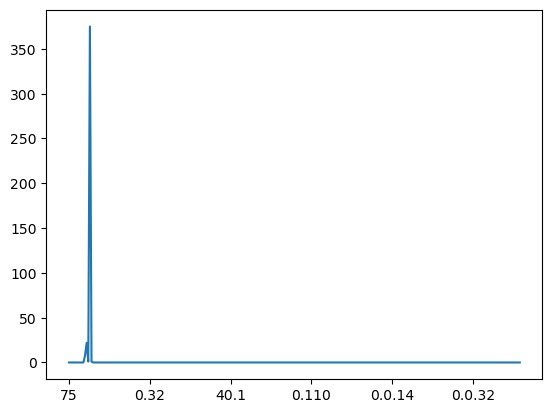

In [29]:
df.isnull().sum().plot()

<AxesSubplot:>

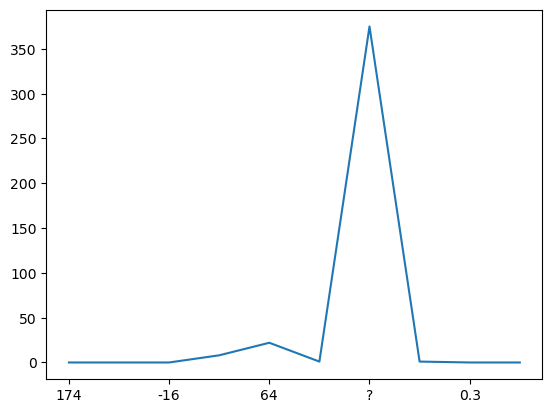

In [32]:
df.isnull().sum()[7:17].plot()

In [34]:
df.drop(columns='?',inplace=True)

In [36]:
df.iloc[0:2,10:15]

,13,64,-2,63,0.3
0,37,-17,31,53,0
1,34,70,66,75,0


In [37]:
df.isnull().sum().sum()

32

### Now we have to put the imputer to handle the null values

In [66]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan, strategy='mean')

In [67]:
new_df=df.copy()

In [68]:
new_df=pd.DataFrame(sim.fit_transform(new_df))
new_df.columns = df.columns

In [71]:
new_df.isnull().sum().sum()

0

In [72]:
new_df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0


### Genrating Final Dataset

In [73]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [74]:
new_df.columns=final_df_columns
# Target column is the class column

In [75]:
new_df.head(2)

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0


In [78]:
t_values=new_df['class'].value_counts()

In [80]:
t_values.dtype

dtype('int64')

In [81]:
class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

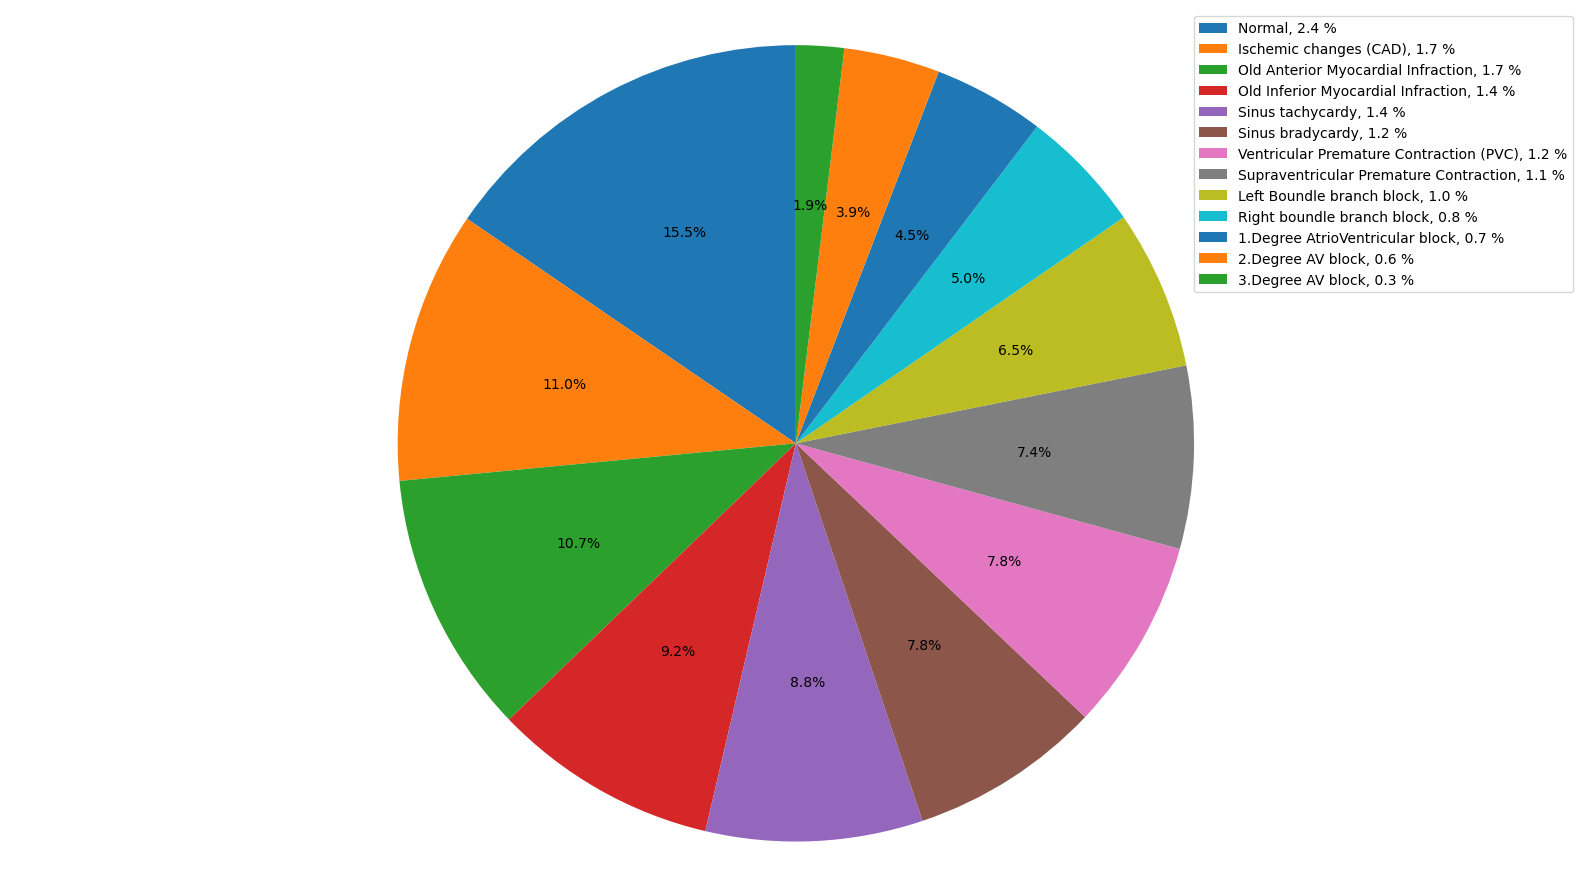

In [82]:
labels = class_names
Log_Norm = []
for i in t_values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

### Handling Outliers & Data Visualization

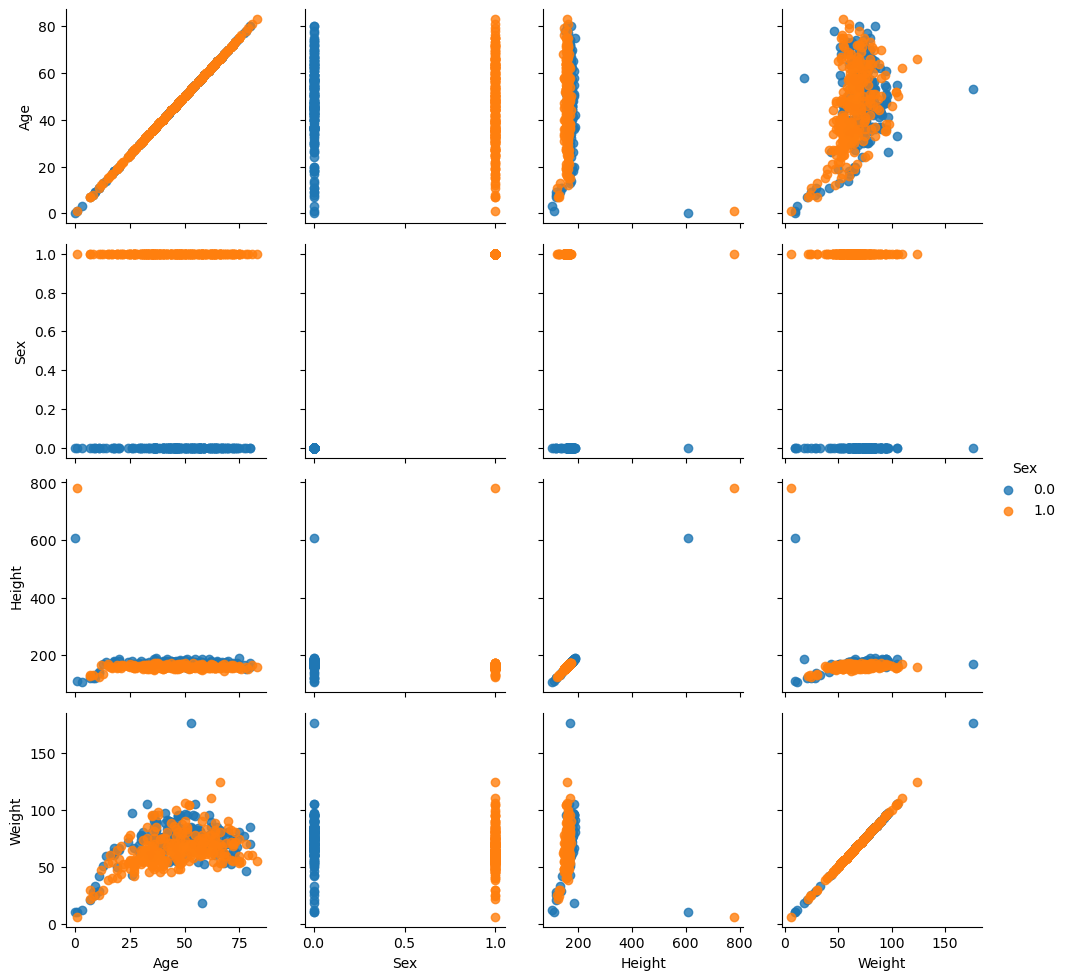

In [85]:
g = sns.PairGrid(new_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### Get The top ten Height

In [87]:
new_df['Height'].sort_values(ascending=False)[0:10]

140    780.0
315    608.0
3      190.0
447    190.0
331    188.0
422    186.0
125    186.0
345    186.0
126    185.0
94     185.0
Name: Height, dtype: float64

In [89]:
# Change the vallues of 780 and 608 to 190 and 185
new_df['Height']=new_df['Height'].replace(780.0,190.0)
new_df['Height']=new_df['Height'].replace(608.0,185.0)

In [90]:
new_df['Height'].sort_values(ascending=False)[0:10]

3      190.0
447    190.0
140    190.0
331    188.0
422    186.0
125    186.0
345    186.0
315    185.0
126    185.0
94     185.0
Name: Height, dtype: float64

### get the top ten weights

In [91]:
new_df['Weight'].sort_values(ascending=False)[:10]

212    176.0
253    124.0
307    110.0
268    106.0
94     105.0
203    105.0
97     104.0
89     104.0
72     100.0
238     98.0
Name: Weight, dtype: float64

In [92]:
# 176 is a possible weight we can keep it

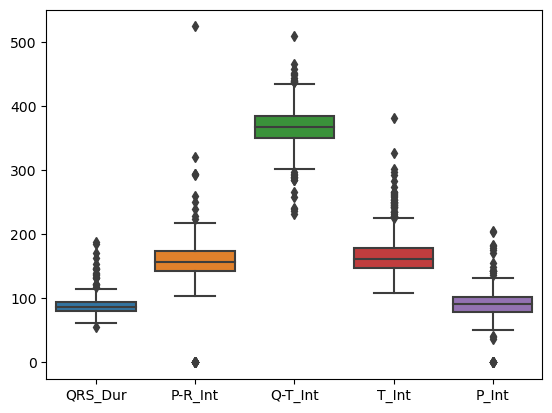

In [94]:
sns.boxplot(data=new_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

In [95]:
new_df['P-R_Int'].sort_values(ascending=False)

392    524.0
270    320.0
109    294.0
70     294.0
94     292.0
       ...  
419      0.0
427      0.0
309      0.0
55       0.0
6        0.0
Name: P-R_Int, Length: 451, dtype: float64

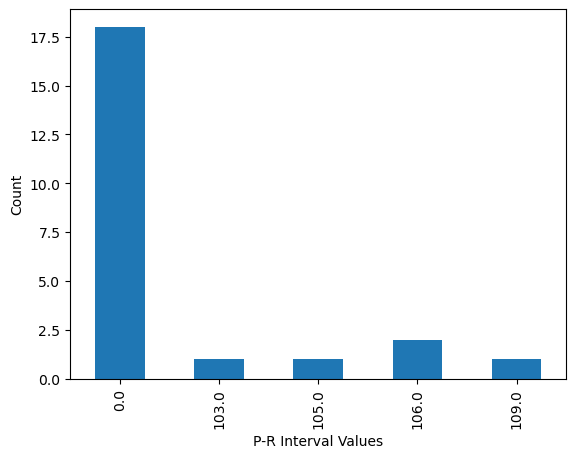

In [96]:
new_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

In [97]:
# It have outliers but we can keep it

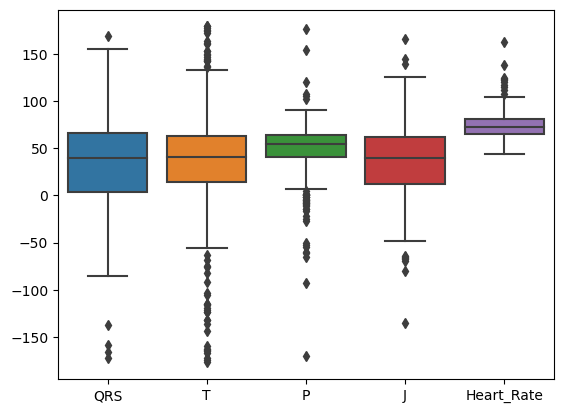

In [99]:
sns.boxplot(data=new_df[["QRS","T","P","J","Heart_Rate"]]);

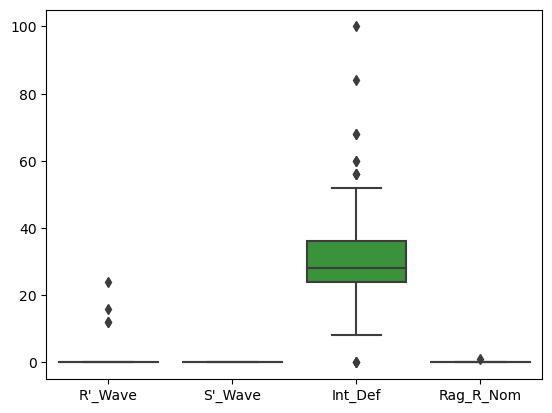

In [101]:
sns.boxplot(data=new_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

In [102]:
# Lets find the corr between the columns

In [103]:
new_df.corr()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
Age,1.000000,-0.055041,0.200981,0.380295,-0.004568,0.038057,0.195911,0.025302,0.095607,-0.262884,...,0.163452,-0.158486,0.081584,0.091024,NaN,-0.042343,-0.277385,0.016968,-0.204824,-0.096395
Sex,-0.055041,1.000000,-0.452180,-0.246827,-0.337234,-0.044792,0.072431,-0.184710,-0.078332,0.066926,...,0.232570,-0.042730,0.093699,0.027243,NaN,0.016981,0.068776,0.032459,0.049385,-0.176193
Height,0.200981,-0.452180,1.000000,0.514177,0.043320,0.074714,0.007000,0.038541,0.123687,-0.105426,...,-0.064845,0.002319,0.051236,0.008476,NaN,-0.044566,-0.071407,0.037985,-0.037080,-0.036211
Weight,0.380295,-0.246827,0.514177,1.000000,0.099938,0.118650,0.118545,0.149894,0.119024,-0.171948,...,0.049708,-0.026920,0.051539,0.047601,NaN,-0.048127,-0.146893,0.061859,-0.052486,-0.091773
QRS_Dur,-0.004568,-0.337234,0.043320,0.099938,1.000000,0.021595,0.218655,0.397415,0.049401,-0.145911,...,-0.199156,0.091390,-0.228796,-0.013673,NaN,-0.066021,-0.222871,0.129723,-0.083224,0.323919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6276,-0.042343,0.016981,-0.044566,-0.048127,-0.066021,0.141499,-0.035300,0.048962,0.245865,0.084931,...,-0.086841,-0.007990,-0.092889,-0.019777,NaN,1.000000,-0.046339,-0.070680,-0.067003,-0.088937
V6277,-0.277385,0.068776,-0.071407,-0.146893,-0.222871,0.059091,-0.039241,-0.185431,0.012957,0.066348,...,0.115842,0.093930,-0.073254,-0.017510,NaN,-0.046339,1.000000,-0.124978,0.687003,-0.033325
V6278,0.016968,0.032459,0.037985,0.061859,0.129723,-0.028268,0.256154,0.130142,-0.017179,0.298921,...,0.002299,0.671457,0.562745,-0.051085,NaN,-0.070680,-0.124978,1.000000,0.611363,0.002868
V6279,-0.204824,0.049385,-0.037080,-0.052486,-0.083224,0.019067,0.150904,-0.014721,0.001413,0.258498,...,0.081450,0.561131,0.341288,-0.049541,NaN,-0.067003,0.687003,0.611363,1.000000,-0.011539


In [104]:
new_df.isnull().sum().sum()

0

In [ ]:
plt.figure(figsize=(150,50))
sns.heatmap(new_df.corr(),annot=True)

### Feature Scalling and Splitting the data

In [109]:
X=new_df.drop(columns='class')
y=new_df['class']

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [111]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [112]:
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

# Model Building

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, weights= 'distance')

In [115]:
knn_param={
    'n_neighbors':[5,7,8,10,15],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [116]:
from sklearn.model_selection import GridSearchCV
knn_grd=GridSearchCV(knn,param_grid=knn_param,cv=5)
knn_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 8, 10, 15],
                         'weights': ['uniform', 'distance']})

In [117]:
knn_grd.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [120]:
knn.score(X_train,y_train)

1.0

In [121]:
knn_pred=knn.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [128]:
knn_predacc=accuracy_score(knn_pred,y_test)

In [129]:
knn_ts=accuracy_score(y_train,knn.predict(X_train))

In [130]:
result=pd.DataFrame(columns=['model','actual','predict'])

In [132]:
result=result.append({'model':'KNNClassifier','actual':knn_ts,'predict':knn_predacc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\3620440282.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'KNNClassifier','actual':knn_ts,'predict':knn_predacc},ignore_index=True)


In [133]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168


# Logisti regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class= 'multinomial', penalty= 'l1', solver= 'saga')

In [135]:
lr_param={
    'penalty':['l1', 'l2', 'elasticnet'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [136]:
lr_grd=GridSearchCV(lr,param_grid=lr_param,cv=5)

In [137]:
lr_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarnin

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [138]:
lr_grd.best_params_

{'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

In [140]:
lr.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga')

In [153]:
lr_ts=lr.score(X_train,y_train)

In [142]:
lr_pred=lr.predict(X_test)

In [145]:
lr_preedAcc=accuracy_score(lr_pred,y_test)

In [150]:
confusion_matrix(lr_pred,y_test)

array([[54,  4,  0,  0,  3,  3,  0,  0,  4,  0,  4],
       [ 1,  7,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0]], dtype=int64)

In [154]:
result=result.append({'model':'Logistic regression','actual':lr_ts,'predict':lr_preedAcc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2253874646.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Logistic regression','actual':lr_ts,'predict':lr_preedAcc},ignore_index=True)


In [163]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
2,Logistic regression,0.926036,0.699115


In [167]:
recall_score(lr_pred,y_test,average='weighted')

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6991150442477876

In [169]:
recall_score(y_train,lr.predict(X_train),average='weighted')

0.9260355029585798

# Decision Tree classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(criterion='gini', max_depth= 10, splitter= 'random')

In [171]:
dtr_param={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[10,15,20,25]
}

In [172]:
dtr_grd=GridSearchCV(dtr,param_grid=dtr_param,cv=5)
dtr_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  F

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'splitter': ['best', 'random']})

In [173]:
dtr_grd.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}

In [175]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, splitter='random')

In [180]:
dtr_ts=dtr.score(X_train,y_train)

In [177]:
dtr_pred=dtr.predict(X_test)

In [179]:
dtr_acc=accuracy_score(dtr_pred,y_test)

In [181]:
result=result.append({'model':'Deission TRee','actual':dtr_ts,'predict':dtr_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\4055359978.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Deission TRee','actual':dtr_ts,'predict':dtr_acc},ignore_index=True)


In [182]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673


In [183]:
recall_score(dtr_pred,y_test,average='weighted')

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5486725663716814

# SVM

In [184]:
from sklearn.svm import LinearSVC 
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train) 
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [187]:
sc_score=lsvclassifier.score(X_train,y_train)

In [188]:
svm_pred=accuracy_score(y_pred_test,y_test)

In [191]:
result=result.append({'model':'Linear SVM','actual':sc_score,'predict':svm_pred},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\304323641.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Linear SVM','actual':sc_score,'predict':svm_pred},ignore_index=True)


In [195]:
result.drop(index=3,inplace=True)

In [196]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
4,Linear SVM,0.899408,0.690265


# SVM

In [200]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
svmpred_test = KSVC_clf.predict(X_test)

In [203]:
ksvc_ts=KSVC_clf.score(X_train, y_train)

In [204]:
ksvc_predacc=accuracy_score(svmpred_test,y_test)

In [205]:
result=result.append({'model':'Sigmoid SVM','actual':ksvc_ts,'predict':ksvc_predacc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\1896196488.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Sigmoid SVM','actual':ksvc_ts,'predict':ksvc_predacc},ignore_index=True)


In [206]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965


# Random Forest classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)

In [209]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [210]:
rfc_ts=rfc.score(X_train,y_train)

In [211]:
rfc_ts

0.9556213017751479

In [212]:
rfc_pred=rfc.predict(X_test)

In [213]:
rfc_acc=accuracy_score(rfc_pred,y_test)

In [214]:
rfc_acc

0.7345132743362832

In [215]:
result=result.append({'model':'Rando Forest','actual':rfc_ts,'predict':rfc_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2947897934.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Rando Forest','actual':rfc_ts,'predict':rfc_acc},ignore_index=True)


In [216]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513


# Boosting technique

In [220]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [221]:
ada.fit(X_train,y_train)
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [224]:
ada_ts=ada.score(X_train,y_train)

In [225]:
gb_ts=gb.score(X_train,y_train)

In [229]:
ada_pred=ada.predict(X_test)

In [230]:
gb_pred=gb.predict(X_test)

In [234]:
ada_acc=accuracy_score(ada_pred,y_test)

In [232]:
gb_acc=accuracy_score(gb_pred,y_test)

In [233]:
gb_acc

0.6902654867256637

In [235]:
result=result.append({'model':'AdaBoost','actual':ada_ts,'predict':ada_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\1269640215.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'AdaBoost','actual':ada_ts,'predict':ada_acc},ignore_index=True)


In [236]:
result=result.append({'model':'GBoost','actual':gb_ts,'predict':gb_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\3550060227.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'GBoost','actual':gb_ts,'predict':gb_acc},ignore_index=True)


In [237]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265


# Naive bayes

In [238]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [239]:
nb.fit(X_train,y_train)

GaussianNB()

In [245]:
nb_ts=nb.score(X_train,y_train)

In [242]:
nb_pred=nb.predict(X_test)

In [243]:
nb_acc=accuracy_score(nb_pred,y_test)

In [244]:
nb_acc

0.5752212389380531

In [246]:
result=result.append({'model':'NaiveBayes','actual':nb_ts,'predict':nb_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\1172225840.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'NaiveBayes','actual':nb_ts,'predict':nb_acc},ignore_index=True)


In [247]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221


#### As per above result we can say naive bayes is underfitting ada boost is genralized but rest are overfitting

### USE PCA with all the models and lets see what wil be happen

In [258]:
from sklearn.decomposition import PCA
pca=PCA(0.98)

In [259]:
pca.fit(X_train)

PCA(n_components=0.98)

In [260]:
pca.n_components_

120

In [326]:
X_train_pca=pca.transform(X_train)

In [327]:
X_test_pca=pca.transform(X_test)

In [289]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

# KNN with PCA

In [266]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [270]:
knn_pca_ts=knnp_clf.score(X_train_pca,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [271]:
knn_Pca_acc=accuracy_score(knnp_clf.predict(X_test_pca),y_test)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [272]:
result=result.append({'model':'KNN PCA','actual':knn_pca_ts,'predict':knn_Pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2646851588.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'KNN PCA','actual':knn_pca_ts,'predict':knn_Pca_acc},ignore_index=True)


In [273]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


In [274]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')

In [275]:
knnp_test_recall

0.6371681415929203

In [276]:
knnp_train_recall

0.6568047337278107

# Logistic with PCA

In [290]:
from sklearn.linear_model import LogisticRegression
lr_pca=LogisticRegression(solver='saga',C=0.01)

In [291]:
lr_pca.fit(X_train_pca,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, solver='saga')

In [292]:
lr_pca_ts=lr_pca.score(X_train_pca,y_train)

In [293]:
lr_pca_acc=accuracy_score(lr_pca.predict(X_test_pca),y_test)

In [294]:
lr_pca_acc

0.6991150442477876

In [295]:
result=result.append({'model':'Logistic regression PCA','actual':lr_pca_ts,'predict':lr_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\3882105483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Logistic regression PCA','actual':lr_pca_ts,'predict':lr_pca_acc},ignore_index=True)


In [296]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# Decission Tree PCA

In [299]:
result.drop_duplicates(inplace=True)

In [301]:
from sklearn.tree import DecisionTreeClassifier
dtr_pca=DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)

In [302]:
dtr_pca.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [304]:
dtr_pca_ts=dtr_pca.score(X_train_pca,y_train)

In [305]:
dtr_pca_acc=accuracy_score(dtr_pca.predict(X_test_pca),y_test)

In [306]:
dtr_pca_acc

0.6637168141592921

In [307]:
result=result.append({'model':'Desicion Tree PCA','actual':dtr_pca_ts,'predict':dtr_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2978125136.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Desicion Tree PCA','actual':dtr_pca_ts,'predict':dtr_pca_acc},ignore_index=True)


In [308]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# Linear SVM with PCA

In [309]:
from sklearn.svm import LinearSVC
lsvc_pca=LinearSVC(C=0.001)

In [311]:
lsvc_pca.fit(X_train_pca,y_train)

LinearSVC(C=0.001)

In [314]:
lsvc_pca_ts=lsvc_pca.score(X_train_pca,y_train)

In [315]:
lsvc_pca_acc=accuracy_score(lsvc_pca.predict(X_test_pca),y_test)

In [316]:
lsvc_pca_acc

0.6991150442477876

In [317]:
result=result.append({'model':'LinearSVC pca','actual':lsvc_pca_ts,'predict':lsvc_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\774589617.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'LinearSVC pca','actual':lsvc_pca_ts,'predict':lsvc_pca_acc},ignore_index=True)


In [318]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# SigmoidSVC PCA

In [319]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [320]:
KSVC_clf_ts=KSVC_clf.score(X_train_pca,y_train)

In [321]:
KSVC_clf_ts

0.8284023668639053

In [322]:
KSVC_clf_acc=accuracy_score(KSVC_clf.predict(X_test_pca),y_test)

In [323]:
KSVC_clf_acc

0.7079646017699115

In [324]:
result=result.append({'model':'Kernel PCA','actual':KSVC_clf_ts,'predict':KSVC_clf_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\914653475.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Kernel PCA','actual':KSVC_clf_ts,'predict':KSVC_clf_acc},ignore_index=True)


In [325]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# Random Forest PCA

In [328]:
from sklearn.ensemble import RandomForestClassifier
rfc_pca=RandomForestClassifier()

In [329]:
rfc_pca.fit(X_train_pca,y_train)

RandomForestClassifier()

In [331]:
rfc_pca_ts=rfc_pca.score(X_train_pca,y_train)

In [332]:
rfc_pca_acc=accuracy_score(rfc_pca.predict(X_test_pca),y_test)

In [333]:
rfc_pca_acc

0.6371681415929203

In [334]:
result=result.append({'model':'Random Forest PCA','actual':rfc_pca_ts,'predict':rfc_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\4105562486.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Random Forest PCA','actual':rfc_pca_ts,'predict':rfc_pca_acc},ignore_index=True)


In [335]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


#  AdaBoost PCA

In [337]:
from sklearn.ensemble import AdaBoostClassifier
ada_pca=AdaBoostClassifier()

In [338]:
ada_pca.fit(X_train_pca,y_train)

AdaBoostClassifier()

In [340]:
ada_pca_ts=ada_pca.score(X_train_pca,y_train)

In [341]:
ada_pca_acc=accuracy_score(ada_pca.predict(X_test_pca),y_test)

In [342]:
ada_pca_acc

0.6017699115044248

In [343]:
result=result.append({'model':'ADABoost PCA','actual':ada_pca_ts,'predict':ada_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\3264659612.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'ADABoost PCA','actual':ada_pca_ts,'predict':ada_pca_acc},ignore_index=True)


In [344]:
result


,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# GBoost PCA

In [345]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pca=GradientBoostingClassifier()

In [346]:
gb_pca.fit(X_train_pca,y_train)

GradientBoostingClassifier()

In [347]:
gb_pca_ts=gb_pca.score(X_train_pca,y_train)

In [349]:
gb_pca_acc=accuracy_score(gb_pca.predict(X_test_pca),y_test)

In [350]:
gb_pca_acc

0.6017699115044248

In [351]:
result=result.append({'model':'GB PCA','actual':gb_pca_ts,'predict':gb_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\2912403542.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'GB PCA','actual':gb_pca_ts,'predict':gb_pca_acc},ignore_index=True)


In [352]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168


# Naive Bayes PCA

In [354]:
from sklearn.naive_bayes import GaussianNB
nb_pca=GaussianNB()

In [355]:
nb_pca.fit(X_train_pca,y_train)

GaussianNB()

In [357]:
nb_pca_ts=nb_pca.score(X_train_pca,y_train)

In [358]:
nb_pca_acc=accuracy_score(nb_pca.predict(X_test_pca),y_test)

In [359]:
nb_pca_acc

0.4336283185840708

In [360]:
result=result.append({'model':'Naive Bayes PCA','actual':nb_pca_ts,'predict':nb_pca_acc},ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8280\606227062.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append({'model':'Naive Bayes PCA','actual':nb_pca_ts,'predict':nb_pca_acc},ignore_index=True)


In [361]:
result

,model,actual,predict
0,KNNClassifier,1.0,0.637168
1,Logistic regression,0.926036,0.699115
2,Deission TRee,0.934911,0.548673
3,Linear SVM,0.899408,0.690265
4,Sigmoid SVM,0.840237,0.707965
5,Rando Forest,0.955621,0.734513
6,AdaBoost,0.633136,0.610619
7,GBoost,1.0,0.690265
8,NaiveBayes,0.372781,0.575221
9,KNN PCA,0.656805,0.637168
